In [0]:
from google.colab import drive

In [2]:
drive.mount('/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /drive


In [0]:
import os

In [0]:
os.chdir('/drive/My Drive/Deep Learning')

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid")
sns.set(color_codes=True)
import tensorflow as tf
tf.__version__
import warnings
warnings.filterwarnings('ignore')

In [8]:
big = pd.read_excel('BigMaxIndex.xlsx')
big.head()

,Country,Big Mac Price in USD,Hourly Wages in USD
0,Argentina,1.42,1.70
1,Australia,1.86,7.80
2,Brazil,1.48,2.05
3,Britain,3.14,12.30
4,Canada,2.21,9.35


In [9]:
big.corr()

,Big Mac Price in USD,Hourly Wages in USD
Big Mac Price in USD,1.000000,0.813396
Hourly Wages in USD,0.813396,1.000000


In [0]:
#join plot
#sns.relplot('Big Mac Price in USD','Hourly Wages in USD',data=big,kind='scatter')

sns.jointplot('Big Mac Price in USD','Hourly Wages in USD',data=big,kind='scatter')
plt.show()

In [0]:
big.info()

# Stochastic Gradient Descent
 y = m * X  + c
 
 > #### output = variable1 * Placeholder + variable2

In [0]:
X = tf.placeholder(dtype=tf.float32,shape=None,name='Input')

In [0]:
m = tf.Variable(initial_value=0,dtype=tf.float32)
c = tf.Variable(initial_value=0,dtype=tf.float32)

In [0]:
layer1 = tf.multiply(X,m,name='Layer1')
output = tf.add(layer1,c,name='ouput')

### Calculating SSE and Back Propagation
sum of squared errors

In [0]:
y_actual = tf.placeholder(dtype=tf.float32,shape=None,name='actual')

In [0]:
sse = tf.reduce_sum(tf.square(tf.subtract(output,y_actual)))

In [0]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

In [0]:
train = optimizer.minimize(sse)

# Data Preprocessing

In [0]:
x_input = big.iloc[:,1:2].values
y_input = big.iloc[:,2:3].values

# Normalization

In [0]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [0]:
mmx = MinMaxScaler()
mmy = MinMaxScaler()

In [0]:
x_norm = mmx.fit_transform(x_input)
y_norm = mmy.fit_transform(y_input)

In [0]:
x_norm,y_norm

In [0]:
def batching(high, batchsize):
    return np.random.randint(0,high, batchsize)

In [0]:
np.random.randint(0,27, 5)

In [0]:
print(x_norm[batching(27,5)])

# Training Model

Epoch: 0,Loss:4.04, Intercept: 0.03 , Slope: 0.02 


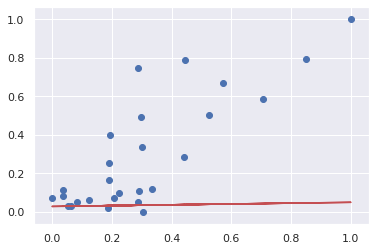

Epoch: 100,Loss:0.98, Intercept: 0.11 , Slope: 0.61 


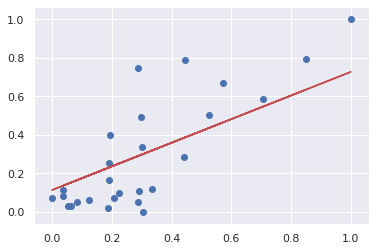

Epoch: 200,Loss:0.82, Intercept: 0.03 , Slope: 0.82 


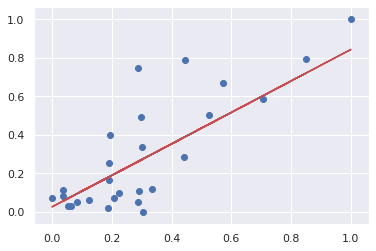

Epoch: 300,Loss:0.79, Intercept: 0.01 , Slope: 0.91 


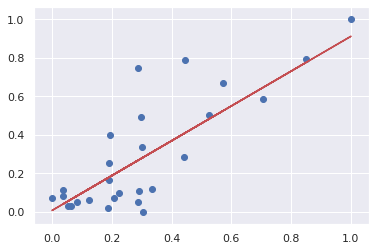

Epoch: 400,Loss:0.79, Intercept: -0.01 , Slope: 0.94 


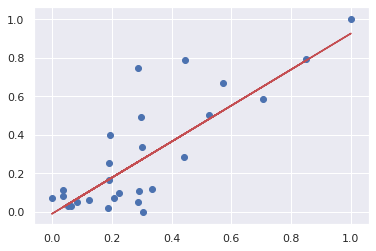

Epoch: 500,Loss:0.79, Intercept: -0.02 , Slope: 0.95 


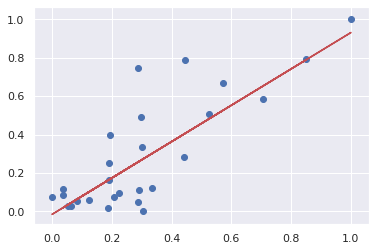

Epoch: 600,Loss:0.79, Intercept: -0.02 , Slope: 0.96 


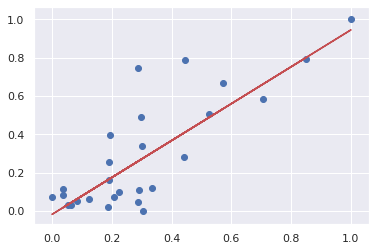

Epoch: 700,Loss:0.78, Intercept: -0.02 , Slope: 0.96 


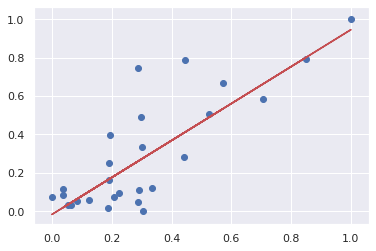

Epoch: 800,Loss:0.78, Intercept: -0.00 , Slope: 0.98 


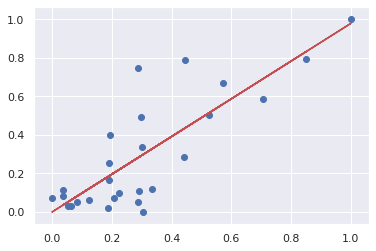

Epoch: 900,Loss:0.79, Intercept: -0.02 , Slope: 0.97 


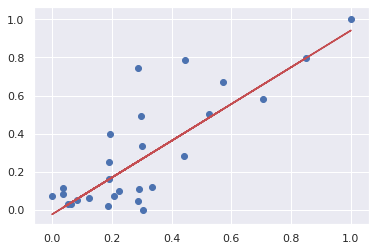

Epoch: 1000,Loss:0.78, Intercept: 0.00 , Slope: 0.99 


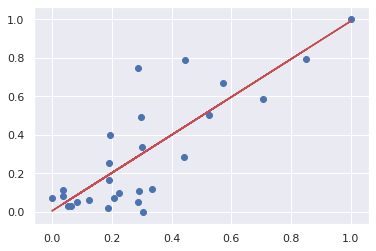

In [28]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    writer = tf.summary.FileWriter('./linearsgd', graph=sess.graph)
    epochs = 1001
    for i in range(epochs):
        ind = batching(27,8)
        sess.run(train,feed_dict={X:x_norm[ind],y_actual:y_norm[ind]})
        if i % 100 == 0:
            
            intercept = sess.run(c,feed_dict={X:x_norm,y_actual:y_norm})
            slope = sess.run(m,feed_dict={X:x_norm,y_actual:y_norm})
            loss = sess.run(sse,feed_dict={X:x_norm,y_actual:y_norm})
            print('Epoch: %s,Loss:%0.2f, Intercept: %0.2f , Slope: %0.2f '%(i,loss,
                                                                            intercept,
                                                                            slope))
            y_hat = intercept + slope * x_norm
            plt.scatter(x_norm,y_norm)
            plt.plot(x_norm,y_hat,'r')
            plt.show()
    writer.close()